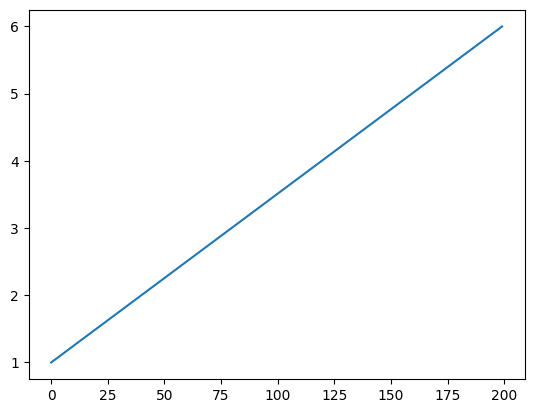

average nominal low = 6710886.4
average nominal high = 20132659.2
scale = 491520.0
offset = 6144.0
1.000 V = 819.2
1 st adc = 68.26666666666667; pitch = 512.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt

MAX_ADC = 4096
ADC_AVERAGE_COUNT = 8192
PITCH_OCTAVES_RANGE = 5

scale = 2**32 / 128 * 12 * PITCH_OCTAVES_RANGE / MAX_ADC
offset = 65536 / 128 * 12

def calib_apply(v):
    v = np.array(v * scale / 65536 + offset)
    return v

raw = np.linspace(0,4095,200)
res = calib_apply(raw)

res = res/65536*(128/12)
plt.plot(res)
plt.show()

cv_average_low = MAX_ADC * ADC_AVERAGE_COUNT * 1 / PITCH_OCTAVES_RANGE
cv_average_high = MAX_ADC * ADC_AVERAGE_COUNT * 3 / PITCH_OCTAVES_RANGE

print(f"average nominal low = {cv_average_low}")
print(f"average nominal high = {cv_average_high}")
print(f"scale = {scale}")
print(f"offset = {offset}")

VOLT = MAX_ADC / 5
SEMITONE = VOLT / 12
print(f"1.000 V = {VOLT}")
print(f"1 st adc = {SEMITONE}; pitch = {65536/128}")


491520.0
5632.0
406775.1724137931
7203.310344827586


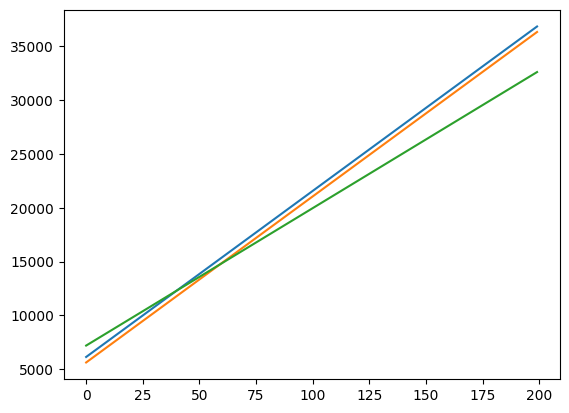

In [14]:

scale = 2**32 / 128 * 12 * PITCH_OCTAVES_RANGE / MAX_ADC
offset = 65536 / 128 * 12
res = calib_apply(raw)
plt.plot(res)

point0 = cv_average_low + SEMITONE * ADC_AVERAGE_COUNT
point1 = cv_average_high + SEMITONE * ADC_AVERAGE_COUNT
adc_range = (point1 - point0) * PITCH_OCTAVES_RANGE / 2
scale = 2**32 / 128 * 12 * PITCH_OCTAVES_RANGE * ADC_AVERAGE_COUNT / adc_range
print(scale)
# offset = (cv_average_low - (cv_average_high - cv_average_low) / 2) * 65536 / 128 * 12
offset = 65536 / 128 * 12 - (point0 - (point1 - point0) / 2) * scale / 65536 / ADC_AVERAGE_COUNT
print(offset)

res = calib_apply(raw)
plt.plot(res)

point0 = cv_average_low
point1 = cv_average_high + SEMITONE * ADC_AVERAGE_COUNT*5
adc_range = (point1 - point0) * PITCH_OCTAVES_RANGE / 2
scale = 2**32 / 128 * 12 * PITCH_OCTAVES_RANGE * ADC_AVERAGE_COUNT / adc_range
print(scale)
# offset = (cv_average_low - (cv_average_high - cv_average_low) / 2) * 65536 / 128 * 12
offset = 65536 / 128 * 12 - (point0 - (point1 - point0) / 2) * scale / 65536 / ADC_AVERAGE_COUNT
print(offset)

res = calib_apply(raw)
plt.plot(res)
plt.show()

In [24]:
print(60/12)
print(60/31)
print(60/31 / 5 * 24)

5.0
1.935483870967742
9.29032258064516
